# REAL

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

## main

In [4]:
col_df = pd.read_csv("./total.col")
col_df.drop(col_df[col_df["0"].str.contains("vp184")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp184")].index, inplace=True)

"""col_df.drop(col_df[col_df["0"].str.contains("vp67")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp67")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("vp116")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp116")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("vp118")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp118")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("vp59")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp59")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("vp63")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("vp63")].index, inplace=True)"""

col_df

,0,1,w
0,vp101,vp176,47
1,vp101,vp179,36
2,vp103,vp114,14
3,vp103,vp117,116
4,vp103,vp52,21
...,...,...,...
188,vp59,vp68,81
189,vp59,vp68,11
190,vp63,vp92,19
191,vp64,vp96,11


In [132]:
col_df = pd.read_csv("./arachis.col")
col_df.drop(col_df[col_df["0"].str.contains("ah98")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah98")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("ah70")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah70")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("ah78")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah78")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("ah64")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah64")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("ah6")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah6")].index, inplace=True)

col_df.drop(col_df[col_df["0"].str.contains("ah15")].index, inplace=True)
col_df.drop(col_df[col_df["1"].str.contains("ah15")].index, inplace=True)

col_df

,0,1,w
0,ah1,ah1,4
1,ah1,ah1,4
2,ah1,ah1,4
3,ah1,ah1,4
4,ah1,ah1,4
...,...,...,...
505155,ah99,ah99,4
505156,ah99,ah99,5
505157,ah99,ah99,5
505158,ah99,ah99,5


In [135]:
col_df = col_df.sort_values(by=["w"], ascending=False)



"""col_df = pd.read_csv("./arachis.col")
col_df = col_df.sort_values(by=["w"], ascending=False)
col_df.drop_duplicates(keep="first")
col_df.head(26)"""

col_df.head(26)

,0,1,w
94,vp117,vp178,412
21,vp106,vp117,273
79,vp116,vp179,217
127,vp151,vp173,198
143,vp169,vp64,175
20,vp106,vp117,159
42,vp114,vp117,159
156,vp174,vp68,140
166,vp179,vp67,123
113,vp118,vp29,123


In [136]:
col_df["w"].describe()

count    177.000000
mean      47.056497
std       50.146458
min       11.000000
25%       16.000000
50%       33.000000
75%       57.000000
max      412.000000
Name: w, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='w', ylabel='Density'>

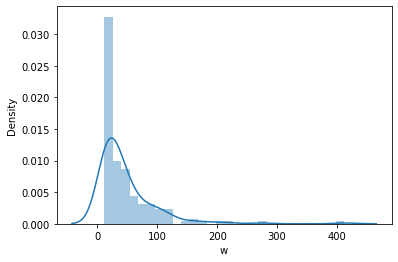

In [137]:
sns.distplot(col_df["w"])

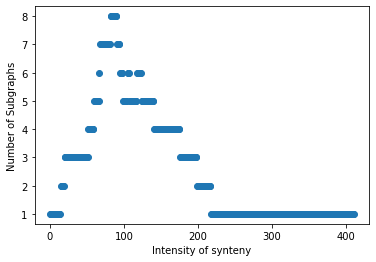

In [138]:
import networkx as nx
import matplotlib.pyplot as plt

"""def one_exclude(l):
    cnt = []
    for i in l:
        if len(i) != 1:
            cnt.append(i)
    return cnt"""

connected_components = []
# on_df = col_df[col_df["w"] >= 5 ]
on_df = col_df.copy()
for i in range(max(on_df["w"])):
    G = nx.from_pandas_edgelist(on_df[on_df["w"] >= i], "0", "1", "w", create_using=nx.Graph())
    connected_components.append(len(list(nx.connected_components(G))))
    # connected_components.append(len(list(map(one_exclude,list(nx.connected_components(G))))))
plt.xlabel('Intensity of synteny')
plt.ylabel('Number of Subgraphs')
plt.xticks(range(0,900,100))
plt.yticks(range(20))
# plt.xticks(range(0,500,100))
# plt.yticks(range(9))
plt.scatter(x = range(max(on_df["w"])), y = connected_components)

for i, c in enumerate(connected_components):
    if c == 10:
        print(i, c)

7


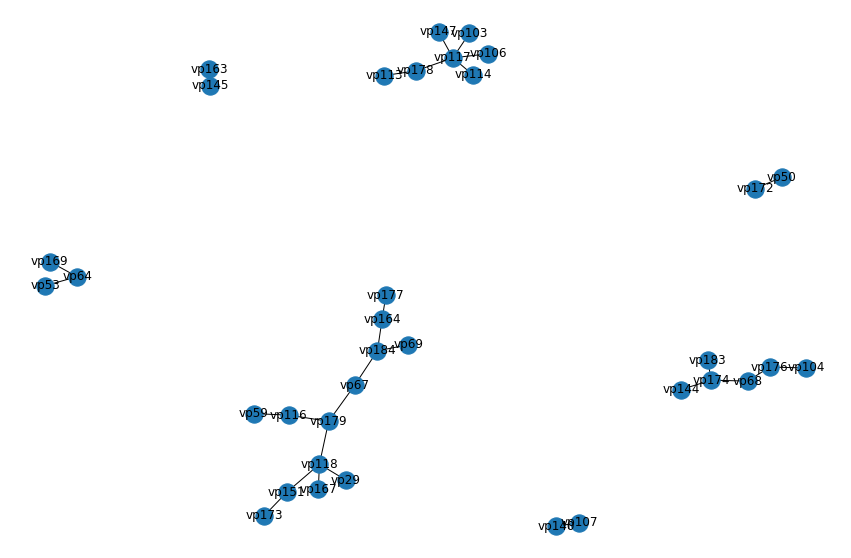

In [86]:
from networkx.exception import NetworkXNoCycle
import random
G = nx.from_pandas_edgelist(col_df[col_df["w"] >= 83], "0", "1", "w", create_using=nx.Graph())

cnt = 0
"""
try: 
    while nx.find_cycle(G):
        cnt+=1
        re = random.choice(nx.find_cycle(G))
        G.remove_edge(re[0], re[1])
except NetworkXNoCycle:
    print(cnt)
"""

axxx, figgg = plt.subplots(figsize=(15,10))
nx.draw(G, with_labels=True)
print(len(list(nx.connected_components(G))))